In [ ]:
#import neccessary libraries and kits 
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [ ]:
#read files using pandas dataframe library
data= pd.read_csv('EthiotelecomCDRData.csv', encoding='utf-8-sig',engine='python')
data.head()

,CDR_ID,RE_ID,BILLING_NBR,CDR_TYPE,CALLING_NUMBER,CALLED_NUMBER,CALLING_IMEI,CALLING_IMSI,THE_THIRD_PARTY_NUMBER,CALL_START_TIME,CALL_END_TIME,CALL_DURATION,CALL_FEE,CALLED_COUNTRY,CALLING_CARRIER,CALLED_CARRIER,CALLING_DISTRICT,CALLED_DISTRICT,STATUS_DATE,CALLING_SUB_ID,BILLING_CYCLE_ID,CHARGE_1CHARGE_2,Unnamed: 22,RATE_ID1,ACCOUNT_ITEM_ID1,UPLOAD_TRAFFIC,DOWNLOAD_TRAFFIC,BILLING_OFFERING_ID,ERROR_CDT_TYPE,CALLFORWARDINDICATOR,HOTLINEINDICATOR,CALLING_TRUNK_ID,CALLED_TRUNK_ID,TOTAL_DOWNLOAD_TRAFFIC,TOTAL_CALL_DURATION,TOTAL_CALL_FEE
0,21881508342,5,995865935,\N,2.520000e+11,\N,\N,\N,\N,0001-08-11 BC,0001-08-11 BC,18,0,\N,1,\N,\N,\N,0001-08-11 BC,\N,201908,0,0,\N,31,549,1484,0,N,\N,\N,\N,\N,1484,18,0
1,21881508721,5,972133472,\N,2.520000e+11,\N,\N,\N,\N,0001-08-11 BC,0001-08-11 BC,956,7004,\N,1,\N,\N,\N,0001-08-11 BC,\N,201908,7004,0,\N,31,418577,3154135,761873383,N,\N,\N,\N,\N,3155619,974,7004
2,21881508722,5,972320618,\N,2.520000e+11,\N,\N,\N,\N,0001-08-11 BC,0001-08-11 BC,4,98,\N,1,\N,\N,\N,0001-08-11 BC,\N,201908,98,0,\N,31,726,530,0,N,\N,\N,\N,\N,3156149,978,7102
3,21881508725,5,983483768,\N,2.520000e+11,\N,\N,\N,\N,0001-08-11 BC,0001-08-11 BC,19,98,\N,1,\N,\N,\N,0001-08-11 BC,\N,201908,98,0,\N,31,396,882,0,N,\N,\N,\N,\N,3157031,997,7200
4,21881508726,5,912262792,\N,2.520000e+11,\N,\N,\N,\N,0001-08-11 BC,0001-08-11 BC,1685,98,\N,1,\N,\N,\N,0001-08-11 BC,\N,201908,98,0,\N,31,17461,8740,0,N,\N,\N,\N,\N,3165771,2682,7298


In [ ]:
data.columns
#just to clean out \nnnnn \aaa and other unknown values
data.columns.str.replace('\n','', regex=True)


Index(['CDR_ID', 'RE_ID', 'BILLING_NBR', 'CDR_TYPE', 'CALLING_NUMBER',
       'CALLED_NUMBER', 'CALLING_IMEI', 'CALLING_IMSI',
       'THE_THIRD_PARTY_NUMBER', 'CALL_START_TIME', 'CALL_END_TIME',
       'CALL_DURATION', 'CALL_FEE', 'CALLED_COUNTRY', 'CALLING_CARRIER',
       'CALLED_CARRIER', 'CALLING_DISTRICT', 'CALLED_DISTRICT', 'STATUS_DATE',
       'CALLING_SUB_ID', 'BILLING_CYCLE_ID', 'CHARGE_1CHARGE_2', 'Unnamed: 22',
       'RATE_ID1', 'ACCOUNT_ITEM_ID1', 'UPLOAD_TRAFFIC', 'DOWNLOAD_TRAFFIC',
       'BILLING_OFFERING_ID', 'ERROR_CDT_TYPE', 'CALLFORWARDINDICATOR',
       'HOTLINEINDICATOR', 'CALLING_TRUNK_ID', 'CALLED_TRUNK_ID',
       'TOTAL_DOWNLOAD_TRAFFIC', 'TOTAL_CALL_DURATION', 'TOTAL_CALL_FEE'],
      dtype='object')

In [ ]:
data.head()

,CDR_ID,RE_ID,BILLING_NBR,CDR_TYPE,CALLING_NUMBER,CALLED_NUMBER,CALLING_IMEI,CALLING_IMSI,THE_THIRD_PARTY_NUMBER,CALL_START_TIME,CALL_END_TIME,CALL_DURATION,CALL_FEE,CALLED_COUNTRY,CALLING_CARRIER,CALLED_CARRIER,CALLING_DISTRICT,CALLED_DISTRICT,STATUS_DATE,CALLING_SUB_ID,BILLING_CYCLE_ID,CHARGE_1CHARGE_2,Unnamed: 22,RATE_ID1,ACCOUNT_ITEM_ID1,UPLOAD_TRAFFIC,DOWNLOAD_TRAFFIC,BILLING_OFFERING_ID,ERROR_CDT_TYPE,CALLFORWARDINDICATOR,HOTLINEINDICATOR,CALLING_TRUNK_ID,CALLED_TRUNK_ID,TOTAL_DOWNLOAD_TRAFFIC,TOTAL_CALL_DURATION,TOTAL_CALL_FEE
0,21881508342,5,995865935,\N,2.520000e+11,\N,\N,\N,\N,0001-08-11 BC,0001-08-11 BC,18,0,\N,1,\N,\N,\N,0001-08-11 BC,\N,201908,0,0,\N,31,549,1484,0,N,\N,\N,\N,\N,1484,18,0
1,21881508721,5,972133472,\N,2.520000e+11,\N,\N,\N,\N,0001-08-11 BC,0001-08-11 BC,956,7004,\N,1,\N,\N,\N,0001-08-11 BC,\N,201908,7004,0,\N,31,418577,3154135,761873383,N,\N,\N,\N,\N,3155619,974,7004
2,21881508722,5,972320618,\N,2.520000e+11,\N,\N,\N,\N,0001-08-11 BC,0001-08-11 BC,4,98,\N,1,\N,\N,\N,0001-08-11 BC,\N,201908,98,0,\N,31,726,530,0,N,\N,\N,\N,\N,3156149,978,7102
3,21881508725,5,983483768,\N,2.520000e+11,\N,\N,\N,\N,0001-08-11 BC,0001-08-11 BC,19,98,\N,1,\N,\N,\N,0001-08-11 BC,\N,201908,98,0,\N,31,396,882,0,N,\N,\N,\N,\N,3157031,997,7200
4,21881508726,5,912262792,\N,2.520000e+11,\N,\N,\N,\N,0001-08-11 BC,0001-08-11 BC,1685,98,\N,1,\N,\N,\N,0001-08-11 BC,\N,201908,98,0,\N,31,17461,8740,0,N,\N,\N,\N,\N,3165771,2682,7298


In [ ]:
'CDR_ID','RE_ID','BILLING_NBR','CDR_TYPE','CALLING_NUMBER','CALLED_NUMBER','CALLING_IMEI',	'CALLING_IMSI',	'THE_THIRD_PARTY_NUMBER','CALL_START_TIME',	'CALL_END_TIME','CALL_DURATION',	'CALL_FEE',	'CALLED_COUNTRY',	'CALLING_CARRIER','CALLED_CARRIER',	'CALLING_DISTRICT',	'CALLED_DISTRICT', 'STATUS_DATE',	'CALLING_SUB_ID',	'BILLING_CYCLE_ID',	'CHARGE_1CHARGE_2',	'RATE_ID1',	'ACCOUNT_ITEM_ID1',	'UPLOAD_TRAFFIC',	'DOWNLOAD_TRAFFIC',	'BILLING_OFFERING_ID','ERROR_CDT_TYPE',	'CALLFORWARDINDICATOR',	'HOTLINEINDICATOR',	'CALLING_TRUNK_ID',	'CALLED_TRUNK_ID'

In [ ]:
from pandas import DataFrame

In [ ]:
#just rename some column name into reasonable names
#dataframe2=data.rename(columns={'Date':'date', 'Country/Region':'Country', 'Lat':'Lat', 'Long':'Long','confirmed/per_date':'confirmed_per_date','Total_Confirmed':'Total_cases_Confirmed','Recovered/date':'Recovered_per_date','Total_Recovered':'Total_Recovered','Deaths/per_date':'Deaths_per_date' ,'Deaths':'Deaths'})
#data2.columns

In [ ]:
df = DataFrame(data,columns=['CDR_ID','RE_ID','BILLING_NBR','CDR_TYPE','CALLING_NUMBER','CALLED_NUMBER','CALLING_IMEI',	'CALLING_IMSI',	'THE_THIRD_PARTY_NUMBER','CALL_START_TIME',	'CALL_END_TIME','CALL_DURATION',	'CALL_FEE',	'CALLED_COUNTRY',	'CALLING_CARRIER','CALLED_CARRIER',	'CALLING_DISTRICT',	'CALLED_DISTRICT', 'STATUS_DATE',	'CALLING_SUB_ID',	'BILLING_CYCLE_ID',	'CHARGE_1CHARGE_2',	'RATE_ID1',	'ACCOUNT_ITEM_ID1',	'UPLOAD_TRAFFIC',	'DOWNLOAD_TRAFFIC',	'BILLING_OFFERING_ID','ERROR_CDT_TYPE',	'CALLFORWARDINDICATOR',	'HOTLINEINDICATOR',	'CALLING_TRUNK_ID',	'CALLED_TRUNK_ID','TOTAL_DOWNLOAD_TRAFFIC','TOTAL_CALL_DURATION','TOTAL_CALL_FEE'])
df['CDR_TYPE'] = df['CDR_TYPE'].replace(['\\N'],0)  
df['CALLED_NUMBER'] = df['CALLED_NUMBER'].replace(['\\N'],0)  
df['CALLING_IMEI'] = df['CALLING_IMEI'].replace(['\\N'],0)  
df[	'CALLING_IMSI'] = df['CALLING_IMSI'].replace(['\\N'],0)  
df[	'THE_THIRD_PARTY_NUMBER'] = df['THE_THIRD_PARTY_NUMBER'].replace(['\\N'],0)  

df['CALLED_COUNTRY'] = df['CALLED_COUNTRY'].replace(['\\N'],0)  
df['CALLED_CARRIER'] = df['CALLED_CARRIER'].replace(['\\N'],0)  
df['CALLING_DISTRICT'] = df['CALLING_DISTRICT'].replace(['\\N'],0)  
df[	'CALLED_DISTRICT'] = df['CALLED_DISTRICT'].replace(['\\N'],0)  
df[	'CALLING_SUB_ID'] = df['CALLING_SUB_ID'].replace(['\\N'],0)  

df['RATE_ID1'] = df['RATE_ID1'].replace(['\\N'],0)  
del df['ERROR_CDT_TYPE']
df['CALLFORWARDINDICATOR'] = df['CALLFORWARDINDICATOR'].replace(['\\N'],0)  
df[	'HOTLINEINDICATOR'] = df['HOTLINEINDICATOR'].replace(['\\N'],0)  
df[	'CALLING_TRUNK_ID'] = df['CALLING_TRUNK_ID'].replace(['\\N'],0)  
df[	'CALLED_TRUNK_ID'] = df['CALLED_TRUNK_ID'].replace(['\\N'],0) 

df['CALL_START_TIME']=df['CALL_START_TIME'].replace(['0001-08-11 BC'],'01-08-11')
df['CALL_END_TIME']=df['CALL_END_TIME'].replace(['0001-08-11 BC'],'01-08-11')
df['CALL_START_TIME']=df['CALL_START_TIME'].replace(['0001-08-10 BC'],'01-08-10')
df['CALL_END_TIME']=df['CALL_END_TIME'].replace(['0001-08-10 BC'],'01-08-10')
df['STATUS_DATE']=df['STATUS_DATE'].replace(['0001-08-11 BC'],'01-08-11')
df['STATUS_DATE']=df['STATUS_DATE'].replace(['0001-08-10 BC'],'01-08-10')

df.head()

,CDR_ID,RE_ID,BILLING_NBR,CDR_TYPE,CALLING_NUMBER,CALLED_NUMBER,CALLING_IMEI,CALLING_IMSI,THE_THIRD_PARTY_NUMBER,CALL_START_TIME,CALL_END_TIME,CALL_DURATION,CALL_FEE,CALLED_COUNTRY,CALLING_CARRIER,CALLED_CARRIER,CALLING_DISTRICT,CALLED_DISTRICT,STATUS_DATE,CALLING_SUB_ID,BILLING_CYCLE_ID,CHARGE_1CHARGE_2,RATE_ID1,ACCOUNT_ITEM_ID1,UPLOAD_TRAFFIC,DOWNLOAD_TRAFFIC,BILLING_OFFERING_ID,CALLFORWARDINDICATOR,HOTLINEINDICATOR,CALLING_TRUNK_ID,CALLED_TRUNK_ID,TOTAL_DOWNLOAD_TRAFFIC,TOTAL_CALL_DURATION,TOTAL_CALL_FEE
0,21881508342,5,995865935,0,2.520000e+11,0,0,0,0,01-08-11,01-08-11,18,0,0,1,0,0,0,01-08-11,0,201908,0,0,31,549,1484,0,0,0,0,0,1484,18,0
1,21881508721,5,972133472,0,2.520000e+11,0,0,0,0,01-08-11,01-08-11,956,7004,0,1,0,0,0,01-08-11,0,201908,7004,0,31,418577,3154135,761873383,0,0,0,0,3155619,974,7004
2,21881508722,5,972320618,0,2.520000e+11,0,0,0,0,01-08-11,01-08-11,4,98,0,1,0,0,0,01-08-11,0,201908,98,0,31,726,530,0,0,0,0,0,3156149,978,7102
3,21881508725,5,983483768,0,2.520000e+11,0,0,0,0,01-08-11,01-08-11,19,98,0,1,0,0,0,01-08-11,0,201908,98,0,31,396,882,0,0,0,0,0,3157031,997,7200
4,21881508726,5,912262792,0,2.520000e+11,0,0,0,0,01-08-11,01-08-11,1685,98,0,1,0,0,0,01-08-11,0,201908,98,0,31,17461,8740,0,0,0,0,0,3165771,2682,7298


In [ ]:
#pd.to_datetime(df['CALL_START_TIME']).dt.total_seconds().astype(int)
df['CALL_START_TIME'] = pd.to_datetime(df['CALL_START_TIME'], infer_datetime_format=True)
df['CALL_END_TIME'] = pd.to_datetime(df['CALL_END_TIME'], infer_datetime_format=True)
df['STATUS_DATE'] = pd.to_datetime(df['STATUS_DATE'], infer_datetime_format=True)
df['STATUS_DATE'] =df['STATUS_DATE'].apply(pd.Timestamp)
df['STATUS_DATE']

0      2011-01-08
1      2011-01-08
2      2011-01-08
3      2011-01-08
4      2011-01-08
          ...    
4829   2011-01-08
4830   2011-01-08
4831   2011-01-08
4832   2011-01-08
4833   2011-01-08
Name: STATUS_DATE, Length: 4834, dtype: datetime64[ns]

In [ ]:
#checking existing cluomns in the dataframe, this would help to solve KeyError: cloumn not index error.
list(df.columns.values)

['CDR_ID',
 'RE_ID',
 'BILLING_NBR',
 'CDR_TYPE',
 'CALLING_NUMBER',
 'CALLED_NUMBER',
 'CALLING_IMEI',
 'CALLING_IMSI',
 'THE_THIRD_PARTY_NUMBER',
 'CALL_START_TIME',
 'CALL_END_TIME',
 'CALL_DURATION',
 'CALL_FEE',
 'CALLED_COUNTRY',
 'CALLING_CARRIER',
 'CALLED_CARRIER',
 'CALLING_DISTRICT',
 'CALLED_DISTRICT',
 'STATUS_DATE',
 'CALLING_SUB_ID',
 'BILLING_CYCLE_ID',
 'CHARGE_1CHARGE_2',
 'RATE_ID1',
 'ACCOUNT_ITEM_ID1',
 'UPLOAD_TRAFFIC',
 'DOWNLOAD_TRAFFIC',
 'BILLING_OFFERING_ID',
 'CALLFORWARDINDICATOR',
 'HOTLINEINDICATOR',
 'CALLING_TRUNK_ID',
 'CALLED_TRUNK_ID',
 'TOTAL_DOWNLOAD_TRAFFIC',
 'TOTAL_CALL_DURATION',
 'TOTAL_CALL_FEE']

In [ ]:
# just use index of columns to find null values
# shows zero missing values
df=df[['CDR_ID',
 'RE_ID','BILLING_NBR', 'CDR_TYPE','CALLING_NUMBER','CALLED_NUMBER','CALLING_IMEI','CALLING_IMSI',
 'THE_THIRD_PARTY_NUMBER','CALL_START_TIME','CALL_END_TIME','CALL_DURATION',
 'CALL_FEE','CALLED_COUNTRY','CALLING_CARRIER','CALLED_CARRIER','CALLING_DISTRICT',
 'CALLED_DISTRICT','STATUS_DATE','CALLING_SUB_ID','BILLING_CYCLE_ID',
 'CHARGE_1CHARGE_2','RATE_ID1','ACCOUNT_ITEM_ID1',
 'UPLOAD_TRAFFIC','DOWNLOAD_TRAFFIC','BILLING_OFFERING_ID','CALLFORWARDINDICATOR',
 'HOTLINEINDICATOR','CALLING_TRUNK_ID','CALLED_TRUNK_ID','TOTAL_DOWNLOAD_TRAFFIC','TOTAL_CALL_DURATION','TOTAL_CALL_FEE']]
df.isna().sum() 

CDR_ID                    0
RE_ID                     0
BILLING_NBR               0
CDR_TYPE                  0
CALLING_NUMBER            0
CALLED_NUMBER             0
CALLING_IMEI              0
CALLING_IMSI              0
THE_THIRD_PARTY_NUMBER    0
CALL_START_TIME           0
CALL_END_TIME             0
CALL_DURATION             0
CALL_FEE                  0
CALLED_COUNTRY            0
CALLING_CARRIER           0
CALLED_CARRIER            0
CALLING_DISTRICT          0
CALLED_DISTRICT           0
STATUS_DATE               0
CALLING_SUB_ID            0
BILLING_CYCLE_ID          0
CHARGE_1CHARGE_2          0
RATE_ID1                  0
ACCOUNT_ITEM_ID1          0
UPLOAD_TRAFFIC            0
DOWNLOAD_TRAFFIC          0
BILLING_OFFERING_ID       0
CALLFORWARDINDICATOR      0
HOTLINEINDICATOR          0
CALLING_TRUNK_ID          0
CALLED_TRUNK_ID           0
TOTAL_DOWNLOAD_TRAFFIC    0
TOTAL_CALL_DURATION       0
TOTAL_CALL_FEE            0
dtype: int64

In [ ]:
"""simple describe method to see mean,standard deviation, first and third qurtile
This could helps to know the distribution of the data/interested column values
"""
df.describe()

,CDR_ID,RE_ID,BILLING_NBR,CDR_TYPE,CALLING_NUMBER,CALLED_NUMBER,CALLING_IMEI,CALLING_IMSI,THE_THIRD_PARTY_NUMBER,CALL_DURATION,CALL_FEE,CALLED_COUNTRY,CALLING_CARRIER,CALLED_CARRIER,CALLING_DISTRICT,CALLED_DISTRICT,CALLING_SUB_ID,BILLING_CYCLE_ID,CHARGE_1CHARGE_2,RATE_ID1,ACCOUNT_ITEM_ID1,UPLOAD_TRAFFIC,DOWNLOAD_TRAFFIC,BILLING_OFFERING_ID,CALLFORWARDINDICATOR,HOTLINEINDICATOR,CALLING_TRUNK_ID,CALLED_TRUNK_ID,TOTAL_DOWNLOAD_TRAFFIC,TOTAL_CALL_DURATION,TOTAL_CALL_FEE
count,4.834000e+03,4834.0,4.834000e+03,4834.0,4.834000e+03,4834.0,4834.0,4834.0,4834.0,4834.000000,4834.000000,4834.0,4834.0,4834.0,4834.0,4834.0,4834.0,4834.0,4834.000000,4834.0,4834.0,4.834000e+03,4.834000e+03,4.834000e+03,4834.0,4834.0,4834.0,4834.0,4.834000e+03,4.834000e+03,4.834000e+03
mean,2.186695e+10,5.0,9.418370e+08,0.0,2.520000e+11,0.0,0.0,0.0,0.0,2701.549441,6430.310509,0.0,1.0,0.0,0.0,0.0,0.0,201908.0,6430.310509,0.0,31.0,1.823104e+06,1.696391e+07,3.016584e+08,0.0,0.0,0.0,0.0,4.064024e+10,5.830974e+06,1.422824e+07
std,1.017676e+08,0.0,2.853397e+07,0.0,0.000000e+00,0.0,0.0,0.0,0.0,8397.972451,25431.597167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25431.597167,0.0,0.0,1.692585e+07,2.590910e+08,3.789739e+08,0.0,0.0,0.0,0.0,3.097489e+10,4.194577e+06,9.208881e+06
min,2.139450e+10,5.0,9.000219e+08,0.0,2.520000e+11,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,201908.0,0.000000,0.0,31.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,1.484000e+03,1.800000e+01,0.000000e+00
25%,2.177302e+10,5.0,9.178210e+08,0.0,2.520000e+11,0.0,0.0,0.0,0.0,29.000000,98.000000,0.0,1.0,0.0,0.0,0.0,0.0,201908.0,98.000000,0.0,31.0,7.770000e+02,1.161000e+03,0.000000e+00,0.0,0.0,0.0,0.0,4.190690e+09,1.895939e+06,5.564553e+06
50%,2.188150e+10,5.0,9.351745e+08,0.0,2.520000e+11,0.0,0.0,0.0,0.0,245.000000,98.000000,0.0,1.0,0.0,0.0,0.0,0.0,201908.0,98.000000,0.0,31.0,6.482450e+04,1.538060e+05,0.000000e+00,0.0,0.0,0.0,0.0,5.341189e+10,5.916319e+06,1.456108e+07
75%,2.199858e+10,5.0,9.652292e+08,0.0,2.520000e+11,0.0,0.0,0.0,0.0,1873.750000,2001.000000,0.0,1.0,0.0,0.0,0.0,0.0,201908.0,2001.000000,0.0,31.0,5.811310e+05,2.473094e+06,7.618734e+08,0.0,0.0,0.0,0.0,6.968013e+10,9.809639e+06,2.247725e+07
max,2.199860e+10,5.0,9.969959e+08,0.0,2.520000e+11,0.0,0.0,0.0,0.0,86400.000000,625313.000000,0.0,1.0,0.0,0.0,0.0,0.0,201908.0,625313.000000,0.0,31.0,5.186865e+08,8.610373e+09,1.986778e+09,0.0,0.0,0.0,0.0,8.200352e+10,1.305929e+07,3.108412e+07


In [ ]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
X, _ = make_blobs(n_samples=4000, centers=3, n_features=12)
df=pd.DataFrame(X, columns=['CDR_ID','CALLING_NUMBER','CALLED_NUMBER''CALL_START_TIME','CALL_END_TIME','CALL_DURATION','CALL_FEE',	 'STATUS_DATE',	'UPLOAD_TRAFFIC',	'DOWNLOAD_TRAFFIC',	'TOTAL_DOWNLOAD_TRAFFIC','TOTAL_CALL_DURATION','TOTAL_CALL_FEE'])
kmeans = KMeans(n_clusters=3)
y= kmeans.fit_predict(df[['CDR_ID','CALLING_NUMBER','CALLED_NUMBER''CALL_START_TIME','CALL_END_TIME','CALL_DURATION','CALL_FEE',	 'STATUS_DATE',	'UPLOAD_TRAFFIC',	'DOWNLOAD_TRAFFIC',	'TOTAL_DOWNLOAD_TRAFFIC','TOTAL_CALL_DURATION','TOTAL_CALL_FEE']])
df['Cluster'] = y
#print(y)
print(df.head())

     CDR_ID  CALLING_NUMBER  ...  TOTAL_CALL_FEE  Cluster
0  0.736086       -8.585304  ...        2.466817        2
1  6.760076       -8.265071  ...        7.391893        1
2  1.617935       -9.260836  ...        2.565681        2
3 -9.857384       -3.718838  ...        2.361053        0
4 -8.276442       -4.091502  ...        3.142019        0

[5 rows x 13 columns]


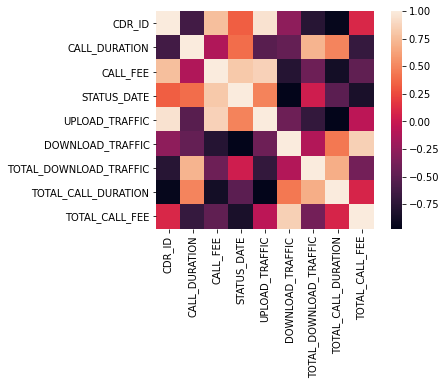

In [ ]:
import seaborn as sns
# calculate the correlation between variables
corrlation_vars = df[['CDR_ID', 'CALL_DURATION','CALL_FEE',	 'STATUS_DATE',	'UPLOAD_TRAFFIC',	'DOWNLOAD_TRAFFIC',
                      'TOTAL_DOWNLOAD_TRAFFIC','TOTAL_CALL_DURATION','TOTAL_CALL_FEE']] 
                      #Subsetting the data
cor = corrlation_vars.corr() #Calculate the correlation of the above variables
sns.heatmap(cor, square = True) #Plot the correlation as heat map

In [ ]:
#let's have simple varible which holds every day incremental values of death, cases and recovery 
data_per_day=df.groupby('STATUS_DATE')['TOTAL_DOWNLOAD_TRAFFIC','TOTAL_CALL_DURATION','TOTAL_CALL_FEE'].max()
data_per_day

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,TOTAL_DOWNLOAD_TRAFFIC,TOTAL_CALL_DURATION,TOTAL_CALL_FEE
STATUS_DATE,,,
-12.456684,-6.887998,-7.557944,7.177770
-12.013817,-6.155725,-7.604464,4.685933
-11.827825,-7.032439,-9.288153,6.924507
-11.826760,-7.055268,-7.859710,7.983358
-11.802033,-5.548010,-7.642089,5.054761
...,...,...,...
7.859273,-6.272862,-9.201722,-0.187839
7.873539,-3.535492,-9.822875,-0.727766
7.885048,-4.866972,-8.995503,0.054021


We have obtained the heatmap of correlation among the variables. The color palette in the side represents the amount of correlation among the variables. The lighter shade represents high correlation. We can see that network download traffic is highly correlated with total call duration. The call duration is also highly correlated with status date.

In [ ]:
data2=df# assign for new dataframe to convert into formated timeseries data
data2.to_csv('Ethiotelecom_data_clean.csv') #just save to new csv file


In [ ]:
vl=df.iloc[:, 0:36].values
vl

array([[ 0.73608608, -8.58530415,  3.07824998, ...,  4.06543956,
         2.46681652,  2.        ],
       [ 6.76007645, -8.26507052, -6.85607672, ...,  1.77354747,
         7.3918933 ,  1.        ],
       [ 1.61793471, -9.26083627,  1.53159643, ...,  4.95523833,
         2.56568133,  2.        ],
       ...,
       [-8.19607704, -5.13714561, -3.88924927, ...,  0.74372443,
         5.56239141,  0.        ],
       [ 8.7744795 , -8.93319952, -7.16162103, ...,  1.48829332,
         8.83209712,  1.        ],
       [ 0.89771747, -8.6873809 ,  1.14214651, ...,  3.58567647,
         5.32033881,  2.        ]])

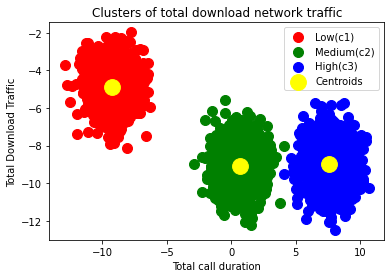

In [ ]:
# Visualizing the clusters
### 1. understand data values or columns 2. changing labels 
plt.scatter(vl[y == 0, 0], vl[y == 0, 1], s = 100, c = 'red', label='Low(c1)')
plt.scatter(vl[y== 2, 0], vl[y == 2, 1], s = 100, c = 'green', label='Medium(c2)')
plt.scatter(vl[y == 1, 0], vl[y == 1, 1], s = 100, c = 'blue', label='High(c3)')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 250, c = 'yellow', label='Centroids')
plt.title('Clusters of total download network traffic')
plt.xlabel('Total call duration')
plt.ylabel('Total Download Traffic')
plt.legend()
plt.show()